Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше 

    
*План работы:*

1) Изучение общей информации

2) Подготовка пользовательских данных

3) Анализ и описание данных

4) Проверка гипотез и пояснения

5) Общий вывод

## Изучение общей информации

*Импортируем pandas и прочем датасеты*

In [1]:
import pandas as pd
calls = pd.read_csv('/datasets/calls.csv')
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [2]:
internet = pd.read_csv('/datasets/internet.csv')
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


*Удалим столбец Unnamed: 0, так как он дублирует индексы*

In [3]:
internet.drop(internet.columns[0], axis=1, inplace=True)
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [4]:
messages = pd.read_csv('/datasets/messages.csv')
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
users = pd.read_csv('/datasets/users.csv')
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


*Найдем нулевые значения и неверный тип данных*

In [7]:
calls.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


*Нулевые значения только в столбце с датой прекращения пользования тарифом. Известно, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Мы точно не узнаем дату и месяц  использования, но мы знаем год, поэтому заменим все пропущенные значения на 2018*

In [12]:
users['churn_date'] =  users['churn_date'].fillna('2018')
users.isnull().sum()

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

## Подготовка пользовательских данных

   
*Переведем мг в гб.Округлим минуты и гигабайты*

In [13]:
calls['duration']

0          0.00
1          0.00
2          2.85
3         13.80
4          5.18
          ...  
202602     0.76
202603    18.83
202604    10.81
202605     4.27
202606    19.62
Name: duration, Length: 202607, dtype: float64

In [14]:
import numpy as np
calls['duration'] = np.ceil(calls['duration'])

In [15]:
calls['duration']

0          0.0
1          0.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 202607, dtype: float64

In [16]:
internet['mb_used'] 

0          112.95
1         1052.81
2         1197.26
3          550.27
4          302.56
           ...   
149391     318.90
149392     490.13
149393       0.00
149394    1246.32
149395     544.37
Name: mb_used, Length: 149396, dtype: float64

In [17]:
internet['mb_used'] = np.ceil(internet['mb_used'])

In [18]:
internet['mb_used']

0          113.0
1         1053.0
2         1198.0
3          551.0
4          303.0
           ...  
149391     319.0
149392     491.0
149393       0.0
149394    1247.0
149395     545.0
Name: mb_used, Length: 149396, dtype: float64

*Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам*

In [19]:
calls['months'] = pd.DatetimeIndex(calls['call_date']).month
calls_per_month = calls.pivot_table(index=['user_id', 'months'], values='duration', aggfunc=['count', 'sum']).reset_index()
calls_per_month.set_axis(['user_id','months','calls_count', 'minut_sum'],axis = 'columns',inplace = True)
calls_per_month

,user_id,months,calls_count,minut_sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0
3172,1499,11,74,612.0


*Посчитаем для каждого пользователя количество отправленных сообщений по месяцам*

In [20]:
messages['months'] = pd.DatetimeIndex(messages['message_date']).month
messages_per_month = messages.pivot_table(index=['user_id', 'months'], values='id', aggfunc=['count']).reset_index()
messages_per_month.set_axis(['user_id','months','messages_count'],axis = 'columns',inplace = True)
messages_per_month

,user_id,months,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [21]:
internet['months'] = pd.DatetimeIndex(internet['session_date']).month
internet_per_month = internet.pivot_table(index=['user_id', 'months'], values='mb_used', aggfunc=['sum']).reset_index()
internet_per_month.set_axis(['user_id','months','internet_sum'],axis = 'columns',inplace = True)
internet_per_month

,user_id,months,internet_sum
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3198,1498,10,20604.0
3199,1499,9,1848.0
3200,1499,10,17809.0
3201,1499,11,17984.0


*Совместим все датасеты в один*

In [22]:
df = calls_per_month.merge(messages_per_month, how='outer')
df2 = df.merge(internet_per_month, how='outer')
data = df2.merge(users, how='outer')
data

,user_id,months,calls_count,minut_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,22.0,2256.0,52,2018,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,60.0,23257.0,52,2018,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,75.0,14016.0,52,2018,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,81.0,14070.0,52,2018,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,57.0,14581.0,52,2018,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,21.0,19588.0,35,2018,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,NaN,NaN,20.0,17516.0,35,2018,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.0,NaN,NaN,35.0,17341.0,35,2018,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


*Заполним все значения на нулевые*

In [23]:
data = data.fillna(0) 
data

,user_id,months,calls_count,minut_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,22.0,2256.0,52,2018,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,60.0,23257.0,52,2018,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,75.0,14016.0,52,2018,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,81.0,14070.0,52,2018,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,57.0,14581.0,52,2018,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.0,21.0,19588.0,35,2018,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,0.0,0.0,20.0,17516.0,35,2018,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.0,0.0,0.0,35.0,17341.0,35,2018,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,0.0,0.0,0.0,0.0,0.0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [24]:
data2 = data.merge(tariffs, left_on='tariff', right_on='tariff_name')
data2

,user_id,months,calls_count,minut_sum,messages_count,internet_sum,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5.0,22.0,159.0,22.0,2256.0,52,2018,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6.0,43.0,172.0,60.0,23257.0,52,2018,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7.0,47.0,340.0,75.0,14016.0,52,2018,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8.0,52.0,408.0,81.0,14070.0,52,2018,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9.0,58.0,466.0,57.0,14581.0,52,2018,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,0.0,0.0,32.0,17232.0,35,2018,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3212,1489,10.0,0.0,0.0,21.0,19588.0,35,2018,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3213,1489,11.0,0.0,0.0,20.0,17516.0,35,2018,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3214,1489,12.0,0.0,0.0,35.0,17341.0,35,2018,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart


  
*Расчитаем помесячную выручку с каждого пользователя*

In [25]:
def tariff_revenue(row):
    minut = row['minut_sum']
    message = row['messages_count']
    mb = row['internet_sum']
    min_limit = row['minutes_included']
    message_limit = row['messages_included']
    mb_limit = row['mb_per_month_included']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']  
    rub_monthly_fee = row['rub_monthly_fee']
    call_balance = minut - min_limit
    messages_balance = message - message_limit
    internet_balance = np.ceil((mb - mb_limit)/ 1024)
    
    if call_balance>0: 
        extra_call_balance = (minut - min_limit) * rub_per_minute 
    else: 
        extra_call_balance = 0
    
    if messages_balance>0: 
        extra_messages_balance = (message - message_limit) * rub_per_message 
    else: 
        extra_messages_balance = 0
    
    if internet_balance > 0: 
        extra_internet_balance = internet_balance * rub_per_gb 
    else: 
        extra_internet_balance = 0
        
    total_revenue = extra_call_balance + extra_messages_balance + extra_internet_balance + rub_monthly_fee
    
    return total_revenue
data2['tariff_revenue'] = data2.apply(tariff_revenue, axis = 1)
data2 

,user_id,months,calls_count,minut_sum,messages_count,internet_sum,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,tariff_revenue
0,1000,5.0,22.0,159.0,22.0,2256.0,52,2018,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,6.0,43.0,172.0,60.0,23257.0,52,2018,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,7.0,47.0,340.0,75.0,14016.0,52,2018,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,8.0,52.0,408.0,81.0,14070.0,52,2018,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,9.0,58.0,466.0,57.0,14581.0,52,2018,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,0.0,0.0,32.0,17232.0,35,2018,Санкт-Петербург,Павел,...,smart,50,15360,500,550,200,3,3,smart,950.0
3212,1489,10.0,0.0,0.0,21.0,19588.0,35,2018,Санкт-Петербург,Павел,...,smart,50,15360,500,550,200,3,3,smart,1550.0
3213,1489,11.0,0.0,0.0,20.0,17516.0,35,2018,Санкт-Петербург,Павел,...,smart,50,15360,500,550,200,3,3,smart,1150.0
3214,1489,12.0,0.0,0.0,35.0,17341.0,35,2018,Санкт-Петербург,Павел,...,smart,50,15360,500,550,200,3,3,smart,950.0


## Анализ и описание данных

  
*Узнаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц*

In [26]:
data2_smart = data2.query('tariff == "smart"')
datasum_smart = data2_smart.pivot_table(index = 'months', values = ['minut_sum', 'messages_count', 'internet_sum'], aggfunc = 'sum').reset_index()
datasum_smart

,months,internet_sum,messages_count,minut_sum
0,0.0,0.0,0.0,0.0
1,1.0,289831.0,620.0,6931.0
2,2.0,673461.0,1397.0,17324.0
3,3.0,1164537.0,2453.0,30034.0
4,4.0,1509702.0,3443.0,41119.0
5,5.0,2231353.0,4762.0,54618.0
6,6.0,2593622.0,5478.0,64885.0
7,7.0,3168466.0,6784.0,82079.0
8,8.0,3908561.0,7905.0,99045.0
9,9.0,4244377.0,8746.0,111439.0


In [27]:
data2_ultra = data2.query('tariff == "ultra"')
datasum_ultra = data2_ultra.pivot_table(index = 'months', values = ['minut_sum', 'messages_count', 'internet_sum'], aggfunc = 'sum').reset_index()
datasum_ultra

,months,internet_sum,messages_count,minut_sum
0,0.0,0.0,0.0,0.0
1,1.0,118382.0,304.0,3853.0
2,2.0,282887.0,527.0,7131.0
3,3.0,649423.0,1195.0,18117.0
4,4.0,926409.0,1736.0,25191.0
5,5.0,1298540.0,2536.0,34192.0
6,6.0,1591148.0,3505.0,40295.0
7,7.0,1866833.0,4536.0,49667.0
8,8.0,2096565.0,5183.0,54653.0
9,9.0,2210554.0,6013.0,62036.0



*Высчитаем среднее, дисперсию и стандартное отклонение*

In [28]:
datasum_smart_mean = datasum_smart.pivot_table(index = 'months', values = ['minut_sum', 'messages_count', 'internet_sum'], aggfunc = 'mean').reset_index()
datasum_smart_mean

,months,internet_sum,messages_count,minut_sum
0,0.0,0.0,0.0,0.0
1,1.0,289831.0,620.0,6931.0
2,2.0,673461.0,1397.0,17324.0
3,3.0,1164537.0,2453.0,30034.0
4,4.0,1509702.0,3443.0,41119.0
5,5.0,2231353.0,4762.0,54618.0
6,6.0,2593622.0,5478.0,64885.0
7,7.0,3168466.0,6784.0,82079.0
8,8.0,3908561.0,7905.0,99045.0
9,9.0,4244377.0,8746.0,111439.0


In [29]:
datasum_ultra_mean = datasum_ultra.pivot_table(index = 'months', values = ['minut_sum', 'messages_count', 'internet_sum'], aggfunc = 'mean').reset_index()
datasum_ultra_mean

,months,internet_sum,messages_count,minut_sum
0,0.0,0.0,0.0,0.0
1,1.0,118382.0,304.0,3853.0
2,2.0,282887.0,527.0,7131.0
3,3.0,649423.0,1195.0,18117.0
4,4.0,926409.0,1736.0,25191.0
5,5.0,1298540.0,2536.0,34192.0
6,6.0,1591148.0,3505.0,40295.0
7,7.0,1866833.0,4536.0,49667.0
8,8.0,2096565.0,5183.0,54653.0
9,9.0,2210554.0,6013.0,62036.0


In [30]:
import numpy as np
np.var(datasum_smart, ddof=1)

months            1.516667e+01
internet_sum      4.068069e+12
messages_count    1.613193e+07
minut_sum         2.747263e+09
dtype: float64

In [31]:
np.var(datasum_ultra, ddof=1)

months            1.516667e+01
internet_sum      1.028778e+12
messages_count    8.648839e+06
minut_sum         7.658338e+08
dtype: float64

In [32]:
np.std(datasum_smart, ddof=1)

months            3.894440e+00
internet_sum      2.016946e+06
messages_count    4.016457e+03
minut_sum         5.241434e+04
dtype: float64

In [33]:
np.std(datasum_ultra, ddof=1)

months            3.894440e+00
internet_sum      1.014287e+06
messages_count    2.940891e+03
minut_sum         2.767370e+04
dtype: float64

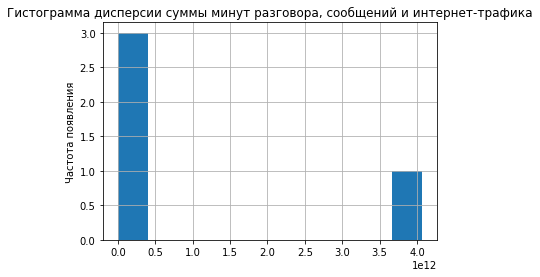

In [34]:
import matplotlib.pyplot as plt
np.var(datasum_smart, ddof=1).hist();
plt.ylabel('Частота появления')
plt.title('Гистограмма дисперсии суммы минут разговора, сообщений и интернет-трафика')
plt.grid(True)
plt.show()

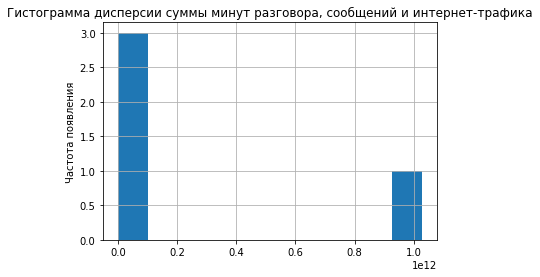

In [35]:
np.var(datasum_ultra, ddof=1).hist();
plt.ylabel('Частота появления')
plt.title('Гистограмма дисперсии суммы минут разговора, сообщений и интернет-трафика')
plt.grid(True)
plt.show()

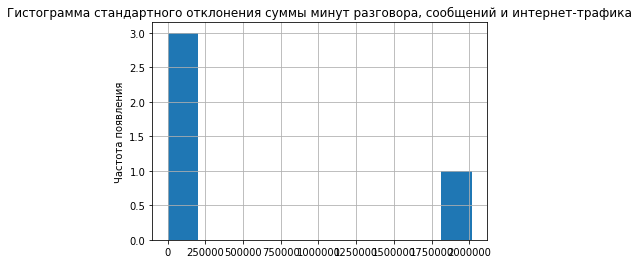

In [36]:
np.std(datasum_smart, ddof=1).hist();
plt.ylabel('Частота появления')
plt.title('Гистограмма стандартного отклонения суммы минут разговора, сообщений и интернет-трафика')
plt.grid(True)
plt.show()

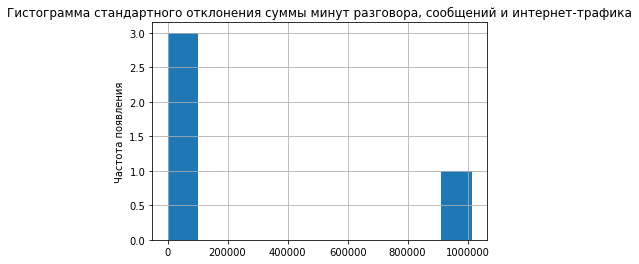

In [37]:
np.std(datasum_ultra, ddof=1).hist();
plt.ylabel('Частота появления')
plt.title('Гистограмма стандартного отклонения суммы минут разговора, сообщений и интернет-трафика')
plt.grid(True)
plt.show()

## Проверка гипотез и пояснения

 
*Различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт»*

*Н_0: Выручка пользователей тарифов «Ультра» = Выручке пользователей тарифов «Смарт»*

*Н_1: Выручка пользователей тарифов «Ультра» != Выручке пользователей тарифов «Смарт»*

In [38]:
from scipy import stats as st

alpha = 0.05 

results = st.ttest_ind(data2.query('tariff == "smart"')['tariff_revenue'], data2.query('tariff == "ultra"')['tariff_revenue'],equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.2414049931248708e-246
Отвергаем нулевую гипотезу


In [39]:
data2.query('tariff == "smart"')['tariff_revenue'].mean(),  data2.query('tariff == "ultra"')['tariff_revenue'].mean()

(1294.3053811659192, 2070.943204868154)

In [40]:
data2.query('tariff == "ultra"')['tariff_revenue']

0      1950.0
1      1950.0
2      1950.0
3      1950.0
4      1950.0
        ...  
981    1950.0
982    1950.0
983    1950.0
984    1950.0
985    1950.0
Name: tariff_revenue, Length: 986, dtype: float64


*Проверим гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов*

Н_0: Выручка пользователей из Москвы = Выручке пользователей в регионах

Н_1: Выручка пользователей из Москвы != Выручке пользователей в регионах

In [41]:
alpha = 0.05 

results = st.ttest_ind(data2.query('city == "Москва"')['tariff_revenue'], data2.query('city != "Москва"')['tariff_revenue'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5277299573181309
Не получилось отвергнуть нулевую гипотезу


## Общий вывод

### Проведя анализ, выяснили, что на тарифе Смарт пользователи чаще превышают лимиты, и средний ежемесячный платеж на этом тарифе более чем в 2 раза первосходит абонентскую плату. Мы отвергаем гипотезу, что выручка пользователей тарифов «Ультра» равна выручке пользователей тарифов «Смарт», а также, что выручка пользователей из Москвы равна выручке пользователей в регионах